In [1]:
using DifferentialEquations
using Plots 

In [2]:
f(u,p,t)=-p*u
u0=100
p=2
time_span=(0,10)

(0, 10)

In [3]:
problem=ODEProblem(f,u0,time_span,p)


ODEProblem with uType Int64 and tType Int64. In-place: false
timespan: (0, 10)
u0: 100

In [5]:
solution=solve(problem)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 28-element Vector{Float64}:
  0.0
  0.07578597989657028
  0.21251711937334877
  0.3747312988980148
  0.5741849847253041
  0.8009028479251012
  1.0566607087825268
  1.3354145648599942
  1.6354085984541507
  1.9525874181728575
  2.2845660874896674
  2.62854518612094
  2.9825099751835222
  ⋮
  4.466244697538196
  4.8493931434778865
  5.237200529476413
  5.6311873331361975
  6.034859968456562
  6.454598260702336
  6.900013989402886
  7.383584845063618
  7.920631488781278
  8.530563598511119
  9.239522911336536
 10.0
u: 28-element Vector{Float64}:
 100.0
  85.93560418481671
  65.3747436348929
  47.262057733403246
  31.715361472330713
  20.153282591191257
  12.08367785084237
   6.919583522782869
   3.7976429816277157
   2.0138385197796023
   1.0367726968900577
   0.5211018046792014
   0.25673896295111853
   ⋮
   0.013208244959233645
   0.006138765316218367

DifferentialEquations.jl defines a plot recipe

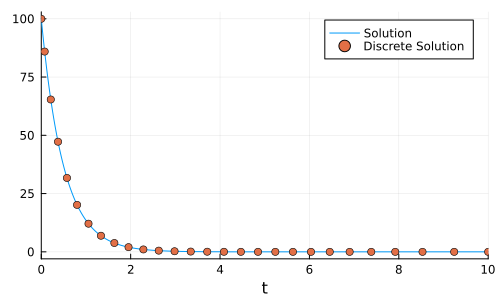

In [12]:
plot(solution,label="Solution",size=(500,300))
scatter!(solution.t,solution.u,label="Discrete Solution")


We see that the package in fact gives not only the value at those points, but it is in fact also capable of calculating an (approximate) solution at any intermediate point, using _interpolation_. In fact, we can access this by treating solution as if it were a function:

In [7]:
tt=1
solution(1)

13.533537786798725

*System of ODE*


In [15]:
s0=0.99
i0=0.01
r0=0

b=0.1
c=0.01

x0=[s0,i0,r0]
para=[b,c]

function SIR(x,p,t)
    s,i,r=x
    β,γ=p

    return [-β*s*i,
            +β*s*i-γ*i,
                  +γ*i
    ]
end

SIR (generic function with 2 methods)

In [18]:
sir_problem=ODEProblem(SIR,x0,(0,200),para)
sir_solution=solve(sir_problem)
#sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)
#Tsit5() choose a solver manually

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 21-element Vector{Float64}:
   0.0
   0.16820521892746104
   1.7687770312611315
   4.997683423311576
   9.111914323948142
  14.19755307362427
  20.263006865634683
  27.376053634279685
  35.662444575805495
  45.32394046209569
  56.86933956802757
  68.69264450442952
  82.42763316310713
  94.13225759248388
 107.0819333210713
 120.45214771827465
 135.44218898824602
 152.0896562161266
 171.51471324338982
 195.03362162277668
 200.0
u: 21-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9898322384367311, 0.010150814514886395, 1.694704838253422e-5]
 [0.9881054761736422, 0.011702974444577664, 0.00019154938178019064]
 [0.9837916665515746, 0.015579254507539992, 0.0006290789408855131]
 [0.9762201283386543, 0.022378187648468148, 0.0014016840128775578]
 [0.9623380925305899, 0.03482799737907186, 0.0028339100903383083]
 [0.936066407815545, 0.05833174418948515

In [49]:
fieldnames(typeof(sir_problem))

fieldnames(ODEProblem)
dump(ODEProblem)
dump(sir_problem)
dump(sir_solution)

UnionAll
  var: TypeVar
    name: Symbol uType
    lb: Union{}
    ub: Any
  body: UnionAll
    var: TypeVar
      name: Symbol tType
      lb: Union{}
      ub: Any
    body: UnionAll
      var: TypeVar
        name: Symbol isinplace
        lb: Union{}
        ub: Any
      body: UnionAll
        var: TypeVar
          name: Symbol P
          lb: Union{}
          ub: Any
        body: UnionAll
          var: TypeVar
            name: Symbol F
            lb: Union{}
            ub: Any
          body: UnionAll
            var: TypeVar
              name: Symbol K
              lb: Union{}
              ub: Any
            body: UnionAll
              var: TypeVar
                name: Symbol PT
                lb: Union{}
                ub: Any
              body: ODEProblem{uType, tType, isinplace, P, F, K, PT} <: SciMLBase.AbstractODEProblem{uType, tType, isinplace}
                f::F
                u0::uType
                tspan::tType
                p::P
                k

LoadError: type ODECompositeSolution has no field maxeig

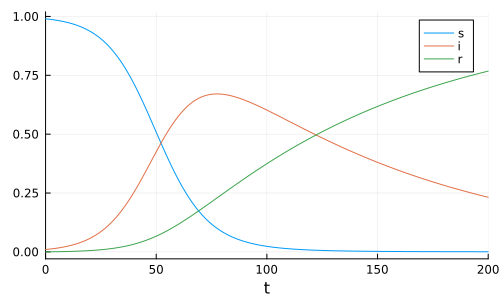

In [29]:
gr()
plot(sir_solution,size=(500,300),labels=["s" "i" "r"])

We can instead plot combinations of variables in phase space or state space:

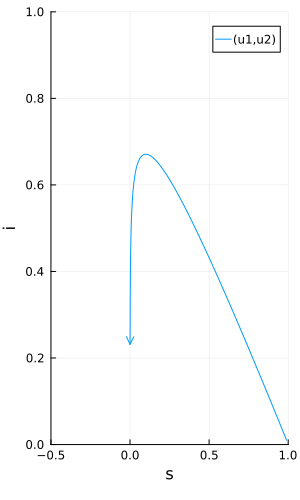

In [34]:
gr()
plot(sir_solution,idxs=(1,2),xlabel="s",ylabel="i",xlims=(-0.5,1),ylims=(0,1),size=(300,500),arrow=true)

Even in 3 dims.

In [35]:
plotly()
plot(sir_solution,idx=(1,2,3),xlabel="s",ylabel="i",zlabel="r",)

The ModelingToolkit.jl library provides ways to make creating ODE models more intuitive, using symbolic equation objects.

Making a object callable like a function

begin

	struct SimpleEulerOutput

		times::Vector{Float64}

		values::Vector{Float64}
		
end
	
	function (soln::SimpleEulerOutput)(t) 
		# use interpolation to calculate the value at time t
		# using  `soln.times` and `soln.values`
	end
end

In [50]:
fieldnames(typeof(sir_solution))

(:u, :u_analytic, :errors, :t, :k, :prob, :alg, :interp, :alg_choice, :dense, :tslocation, :destats, :retcode)

In [54]:
[typeof(sir_problem).parameters]

1-element Vector{Core.SimpleVector}:
 svec(Vector{Float64}, Tuple{Int64, Int64}, false, Vector{Float64}, ODEFunction{false, SciMLBase.AutoSpecialize, typeof(SIR), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem)

#
Making parameterized types!
#

In [55]:
struct MyODEType{T,U}
    u0::T

    tstart::U
    tend::U
end

In [63]:
new_var=MyODEType(10,0.1,.1)
new_var.u0

10

In [64]:
new2_var=MyODEType([1,2,3],.9,.3)

MyODEType{Vector{Int64}, Float64}([1, 2, 3], 0.9, 0.3)